# Downstream Analysis for the scGNN results

C:\Users\moham\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


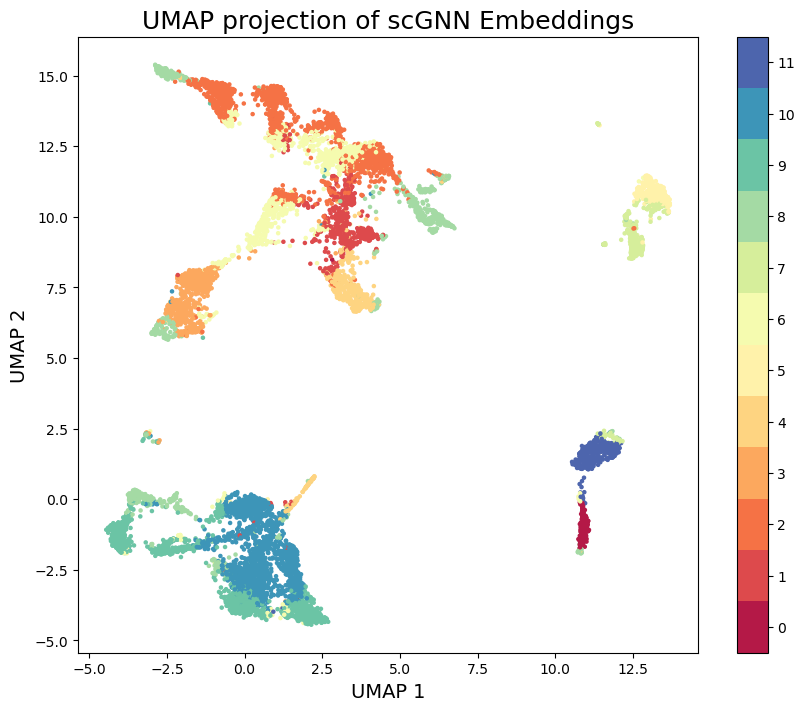

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from umap import UMAP  # This assumes umap-learn is installed correctly

# Load the embeddings
embedding_file = 'outputdir/GSE198623_embedding.csv'
embeddings = pd.read_csv(embedding_file, index_col=0)
embeddings_values = embeddings.values

# Initialize and fit UMAP
reducer = UMAP(n_neighbors=30, min_dist=0.1, n_components=2, random_state=2)
umap_embeddings = reducer.fit_transform(embeddings_values)

# Load cluster labels
results_file = 'outputdir/GSE198623_results.txt'
cluster_labels = pd.read_csv(results_file, index_col=0)
cluster_labels_values = cluster_labels['Celltype'].values  # Adjust if your column name is different

# Plot UMAP projections with cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=cluster_labels_values, cmap='Spectral', s=5)
plt.title('UMAP projection of scGNN Embeddings', fontsize=18)
plt.xlabel('UMAP 1', fontsize=14)
plt.ylabel('UMAP 2', fontsize=14)

# Create colorbar
unique_labels = np.unique(cluster_labels_values)
colorbar = plt.colorbar(scatter, boundaries=np.arange(len(unique_labels)+1)-0.5, ticks=np.arange(len(unique_labels)))
colorbar.set_ticklabels(unique_labels)  # Set the tick labels to the unique labels of your clusters
plt.clim(-0.5, len(unique_labels)-0.5)

plt.show()

C:\Users\moham\anaconda3\Lib\site-packages\scanpy\plotting\_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
C:\Users\moham\anaconda3\Lib\site-packages\scanpy\plotting\_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
C:\Users\moham\anaconda3\Lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


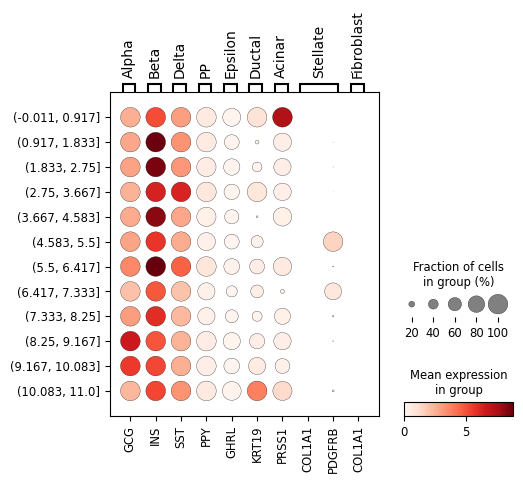

In [16]:
import scanpy as sc
import pandas as pd

# Assuming `adata` is your AnnData object containing the imputed gene expression matrix
# If you have your expression data in a CSV file as mentioned (*_recon.csv), you can read it into an AnnData object like so:
gene_expression_df = pd.read_csv('outputdir/GSE198623_recon.csv', index_col=0)
adata = sc.AnnData(gene_expression_df.transpose())

# If your cluster labels are in a separate file, you can add them to the AnnData object like this:
cluster_labels_df = pd.read_csv('outputdir/GSE198623_results.txt', index_col=0)
adata.obs['Celltype'] = cluster_labels_df['Celltype'].values  # Adjust if the column name is different

# Here's your marker_genes_dict from above
marker_genes_dict = {
    'Alpha': ['GCG'],
    'Beta': ['INS'],
    'Delta': ['SST'],
    'PP': ['PPY'],
    'Epsilon': ['GHRL'],
    'Ductal': ['KRT19'],
    'Acinar': ['PRSS1'], 
    #'Immune': ['PTPRC'],
    'Stellate': ['COL1A1', 'PDGFRB'],
    'Fibroblast': ['COL1A1'],
    #'Endothelial': ['PLVAP']
}

# Now, we can create the dot plot using the integer-encoded 'Celltype'
sc.pl.dotplot(adata, marker_genes_dict, groupby='Celltype', num_categories = 12)


C:\Users\moham\anaconda3\Lib\site-packages\scanpy\plotting\_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
C:\Users\moham\anaconda3\Lib\site-packages\scanpy\plotting\_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
C:\Users\moham\anaconda3\Lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


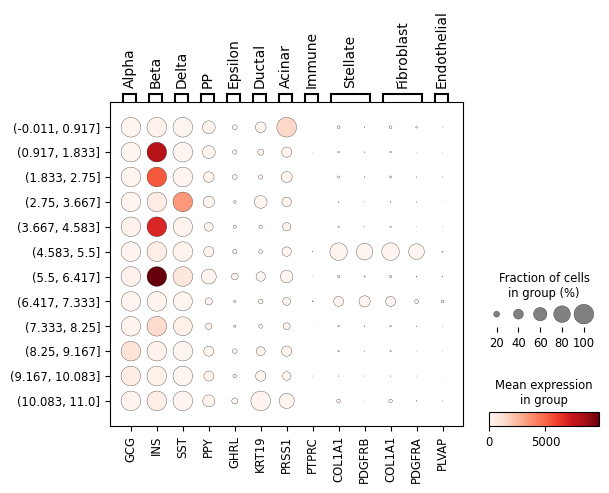

In [13]:
import scanpy as sc
import pandas as pd

# Assuming `adata` is your AnnData object containing the imputed gene expression matrix
# If you have your expression data in a CSV file as mentioned (*_recon.csv), you can read it into an AnnData object like so:
gene_expression_df = pd.read_csv('outputdir/GSE198623_submatrix.csv', index_col=0)
adata = sc.AnnData(gene_expression_df.transpose())

# If your cluster labels are in a separate file, you can add them to the AnnData object like this:
cluster_labels_df = pd.read_csv('outputdir/GSE198623_results.txt', index_col=0)
adata.obs['Celltype'] = cluster_labels_df['Celltype'].values  # Adjust if the column name is different

# Here's your marker_genes_dict from above
marker_genes_dict = {
    'Alpha': ['GCG'],
    'Beta': ['INS'],
    'Delta': ['SST'],
    'PP': ['PPY'],
    'Epsilon': ['GHRL'],
    'Ductal': ['KRT19'],
    'Acinar': ['PRSS1'], 
    'Immune': ['PTPRC'],
    'Stellate': ['COL1A1', 'PDGFRB'],
    'Fibroblast': ['COL1A1', 'PDGFRA'],
    'Endothelial': ['PLVAP']
}

# Now, we can create the dot plot using the integer-encoded 'Celltype'
sc.pl.dotplot(adata, marker_genes_dict, groupby='Celltype', num_categories = 12)


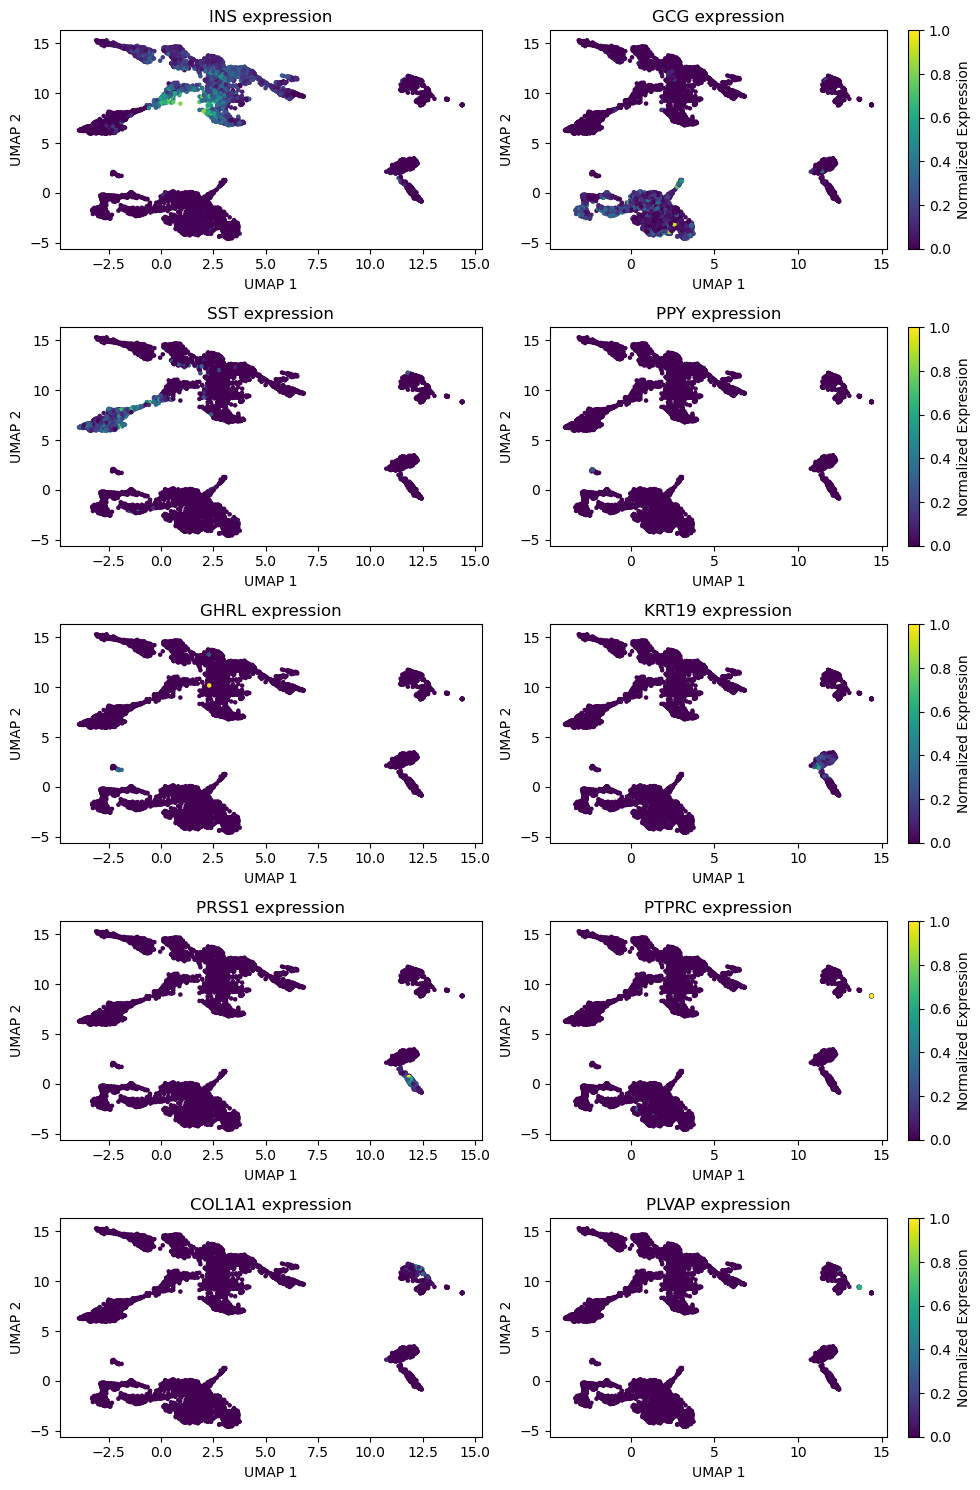

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP

# Load the data
gene_expression = pd.read_csv('outputdir/GSE198623_submatrix.csv', index_col=0).T
cluster_labels = pd.read_csv('outputdir/GSE198623_results.txt', index_col=0)


# Define marker genes
marker_genes_pairs = [
    ['INS', 'GCG'],
    ['SST', 'PPY'],
    ['GHRL', 'KRT19'],
    ['PRSS1', 'PTPRC'],
    ['COL1A1', 'PLVAP']
]

# Create a UMAP plot for each pair of marker genes
n_pairs = len(marker_genes_pairs)
fig, axes = plt.subplots(n_pairs, 2, figsize=(10, 3 * n_pairs))  # Adjust the size as needed

# Define the color scale based on all the genes to have a common scale for all subplots
all_expressions = []
for gene_pair in marker_genes_pairs:
    for gene in gene_pair:
        if gene in gene_expression.columns:
            all_expressions.append(gene_expression[gene] / gene_expression[gene].max())
all_expressions = np.hstack(all_expressions)
vmin, vmax = all_expressions.min(), all_expressions.max()

for i, gene_pair in enumerate(marker_genes_pairs):
    for j, gene in enumerate(gene_pair):
        ax = axes[i, j]
        if gene in gene_expression.columns:
            normalized_expression = gene_expression[gene] / gene_expression[gene].max()
            sc = ax.scatter(
                umap_embeddings[:, 0], umap_embeddings[:, 1],
                c=normalized_expression, cmap='viridis', s=5, vmin=vmin, vmax=vmax
            )
            ax.set_title(f'{gene} expression')
        #else:
            #ax.set_title(f'{gene} not found')
      
        ax.set_xlabel('UMAP 1')
        ax.set_ylabel('UMAP 2')

# Add a colorbar to the last subplot in each row
for i in range(n_pairs):
    fig.colorbar(sc, ax=axes[i, -1], label='Normalized Expression')

plt.tight_layout()
plt.show()